# Goal: to varify the ported dwtest in python is usable or not compare to dwtest in R

# ref https://github.com/dima-quant/dwtest

In [1]:

from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels
import statsmodels.stats.outliers_influence as sso

In [2]:
nlist = [10,20,50,100,200,500,1000]
klist = [1,2,3,5,10]
rholist = [0,0.1,0.3,0.5]
it = 10000
alpha = 0.05
# output format
colnames = [str(i) for i in klist]
rownames = [str(i) for i in nlist]*2
#  directory name
pys = "pyresult_ds"
rs = "rresult_ds"

### For $\rho$ = 0:

    We calculate Type I error rate
    
### For $\rho \neq$ 0:
    For right-tail and two-tail test:
    
        We calculate Type II error rate
        
    For left-tail test:
    
        We calculate Type I error rate
    

In [3]:
for k in rholist:
    print(str(k) + "------------------------------")
    # ---------
    pym_r = np.zeros((len(nlist),len(klist)))
    pym_t = np.zeros((len(nlist),len(klist)))
    pym_l = np.zeros((len(nlist),len(klist)))
    rm_r = np.zeros((len(nlist),len(klist)))
    rm_t = np.zeros((len(nlist),len(klist)))
    rm_l = np.zeros((len(nlist),len(klist)))
    
    
    # ---------
    for i in range(len(nlist)):
        for j in range(len(klist)):
            thisn = it
            if nlist[i] == klist[j]:
                pym_r[i,j] = float("nan")
                pym_t[i,j] = float("nan")
                pym_l[i,j] = float("nan")
                rm_r[i,j] = float("nan")
                rm_t[i,j] = float("nan")
                rm_l[i,j] = float("nan")
                continue
            # -------- file name
            tmpname = "pval" + str(nlist[i]) + "_" + str(klist[j]) + "_" + str(k)
            # --------
            df_py1 = pd.read_csv(pys + "1/py_" + tmpname + ".csv")
            df_py2 = pd.read_csv(pys + "2/py_" + tmpname + ".csv")
            df_r1 = pd.read_csv(rs + "1/r_" + tmpname + ".csv")
            df_r2 = pd.read_csv(rs + "2/r_" + tmpname + ".csv")
            df_py = pd.concat([df_py1,df_py2],ignore_index = True,sort = False,axis = 0)
            df_r = pd.concat([df_r1,df_r2],ignore_index = True,sort = False,axis = 0)
            dftmp = pd.concat([df_py,df_r],axis = 1).dropna()
            # -------- fail rate
            if dftmp.shape[0] != it:
                thisn = dftmp.shape[0]
                v = np.around((it-dftmp.shape[0])/it*100,decimals = 2)
                if v > 10:
                    print("For n = %d, k = %d, rho = %.1f"%(nlist[i],klist[j],k), " fail rate : ",v ,"%","----!")
                else:
                    print("For n = %d, k = %d, rho = %.1f"%(nlist[i],klist[j],k), " fail rate : ",v ,"%")
                
            # -------- ,decimals = 3
            if k == 0: # type I error rate for rho = 0
                pym_r[i,j] = (dftmp[tmpname+"_r"]< alpha).sum()/thisn*100
                pym_t[i,j] = (dftmp[tmpname+"_t"]< alpha).sum()/thisn*100
                pym_l[i,j] = (dftmp[tmpname+"_l"]< alpha).sum()/thisn*100
                rm_r[i,j] = (dftmp["right"]< alpha).sum()/thisn*100
                rm_t[i,j] = (dftmp["twotail"]< alpha).sum()/thisn*100
                rm_l[i,j] = (dftmp["left"]< alpha).sum()/thisn*100
            else:
                # type I error rate for left tail
                pym_l[i,j] = (dftmp[tmpname+"_l"]< alpha).sum()/thisn*100
                rm_l[i,j] = (dftmp["left"]< alpha).sum()/thisn*100
                # type II error rate for left tail
                pym_r[i,j] = (dftmp[tmpname+"_r"]> alpha).sum()/thisn*100
                pym_t[i,j] = (dftmp[tmpname+"_t"]> alpha).sum()/thisn*100
                rm_r[i,j] = (dftmp["right"]> alpha).sum()/thisn*100
                rm_t[i,j] = (dftmp["twotail"]> alpha).sum()/thisn*100
                
            # --------
    if  not os.path.exists("anstable"):
        os.mkdir("anstable")
    os.chdir("anstable")
    
    pd.DataFrame(np.vstack([pym_r,rm_r]), columns = colnames, index=rownames).to_csv(str(k)+"_right(%)"+".csv" ,mode = 'a',header = True,index = True)
    pd.DataFrame(np.vstack([pym_t,rm_t]), columns = colnames, index=rownames).to_csv(str(k)+"_twotail(%)"+".csv" ,mode = 'a',header = True,index = True)
    pd.DataFrame(np.vstack([pym_l,rm_l]), columns = colnames, index=rownames).to_csv(str(k)+"_left(%)"+".csv" ,mode = 'a',header = True,index = True)
    os.chdir("../")
    
    
            

0------------------------------
0.1------------------------------
0.3------------------------------
0.5------------------------------


#### Fail rate demonstrates the number of iterations in which dwtest cannot calculate the pvalue(generate errors) divided by the total number of iterations.

#### Seems like the pan algorithm has some problem calculating p values, sometimes it will raise Error.
#### ValueErrors come from the function $\textbf{numpy.linalg.eigvals()}$, which is used to calculating eigenvalues. However, the function will raise ValueError when there exist complex eigenvalues.

In [4]:
def drawcomparsion(n,k,rho,test = "right"):
    tmpname = "pval" + str(n) + "_" + str(k) + "_" + str(rho)
    # --------
    df_py1 = pd.read_csv(pys + "1/py_" + tmpname + ".csv")
    df_py2 = pd.read_csv(pys + "2/py_" + tmpname + ".csv")
    df_r1 = pd.read_csv(rs + "1/r_" + tmpname + ".csv")
    df_r2 = pd.read_csv(rs + "2/r_" + tmpname + ".csv")
    df_py = pd.concat([df_py1,df_py2],ignore_index = True,sort = False,axis = 0)
    df_r = pd.concat([df_r1,df_r2],ignore_index = True,sort = False,axis = 0)
    dftmp = pd.concat([df_py,df_r],axis = 1).dropna()
    print("1")
    if test == "right":
        plt.hist([dftmp[tmpname+"_r"],dftmp["right"]], bins = 'auto',color = ['mistyrose','skyblue'],label = ["Python","R"])
        plt.legend(loc='upper right')
        plt.title('p value of right-tailed test')
        plt.axvline(0.05, color='k', linestyle='dashed', linewidth=1)
        plt.show()
    elif test == "twotail":
        plt.hist([dftmp[tmpname+"_t"],dftmp["twotail"]], bins = 'auto',color = ['mistyrose','skyblue'],label = ["Python","R"])
        plt.legend(loc='upper right')
        plt.title('p value of two-tailed test')
        plt.axvline(0.05, color='k', linestyle='dashed', linewidth=1)
        plt.show()
    elif test == "left":
        plt.hist([dftmp[tmpname+"_l"],dftmp["left"]], bins = 'auto',color = ['mistyrose','skyblue'],label = ["Python","R"])
        plt.legend(loc='upper right')
        plt.title('p value of left-tailed test')
        plt.axvline(0.05, color='k', linestyle='dashed', linewidth=1)
        plt.show()

right-tailed<br>
$H_0$ : $\rho = 0$<br>
$H_1$ : $\rho$ > 0<br>

1


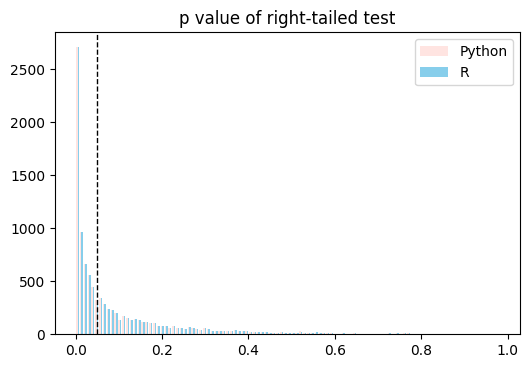

In [5]:
drawcomparsion(50,3,0.3,"right")

two-tailed<br>
$H_0$ : $\rho = 0$<br>
$H_1$ : $\rho$ $\neq$ 0<br>

1


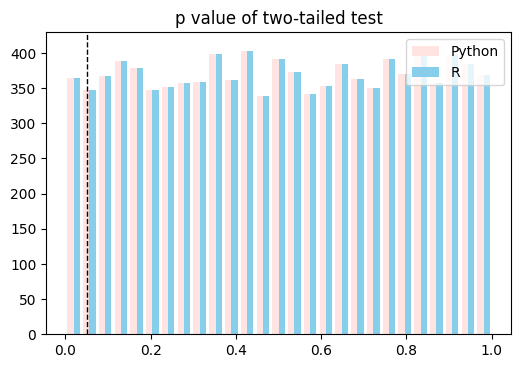

In [6]:
drawcomparsion(100,5,0,"twotail")

left-tailed<br>
$H_0$ : $\rho = 0$<br>
$H_1$ : $\rho$ < 0

1


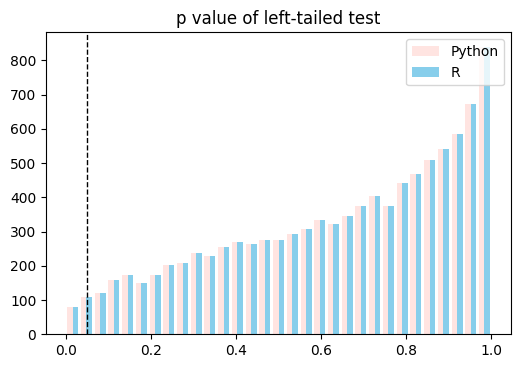

In [7]:
drawcomparsion(20,10,0.3,"left")

# compare execution time

In [16]:
dfpyt = pd.read_csv("meantime.csv")
dfrt = pd.read_csv("meantime_r.csv")
dft = pd.concat([dfpyt,dfrt],axis = 1)
dft["delta"] = dfpyt["mean"] - dfrt["mean"]

In [17]:
dft

,mean,mean,delta
0,0.002780,0.003830,-0.001050
1,0.001202,0.003669,-0.002467
2,0.001262,0.003969,-0.002707
3,0.001334,0.003637,-0.002303
4,0.001643,0.004459,-0.002816
...,...,...,...
75,0.002089,0.009737,-0.007649
76,0.002983,0.016450,-0.013466
77,0.002930,0.015981,-0.013051
78,0.003465,0.015750,-0.012285
